# Pruning defense

Prune an EfficientNetv2 model that has been pretrained on the CIFAR-10 dataset.

In [29]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [3]:
from Data import Data

In [4]:
DATASETS_DIR = os.path.join("..", "datasets")
CIFAR_DIR = os.path.join(DATASETS_DIR, "CIFAR10", "cifar-10")

MODEL_NAME = 'efficientnet_v2_s'
WEIGHT_PATH = os.path.join("..", "models", "efficientnet_v2_s_cifar10.pth")

## Load locally stored CIFAR-10

We'll just be using the clean dataset for now.

In [5]:
train_images = os.path.join(CIFAR_DIR, "train", "data.npy")
train_labels = os.path.join(CIFAR_DIR, "train", "labels.npy")
test_images = os.path.join(CIFAR_DIR, "test", "data.npy")
test_labels = os.path.join(CIFAR_DIR, "test", "labels.npy")

cifar_10_dataset= Data(train_images=train_images,train_labels=train_labels,
                     test_images=test_images,test_labels=test_labels)

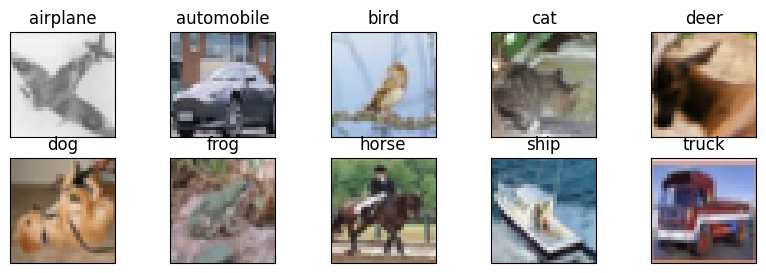

In [6]:
# cifar_10_dataset.normalize()
cifar_10_dataset.show_images()

## Load the pretrained weights

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.hub.load('hankyul2/EfficientNetV2-pytorch', MODEL_NAME, nclass=cifar_10_dataset.num_classes, skip_validation=False)
model.to(device)

state_dict = torch.load(WEIGHT_PATH)
model.load_state_dict(state_dict)

device

Using cache found in C:\Users\Duje/.cache\torch\hub\hankyul2_EfficientNetV2-pytorch_main


device(type='cuda')

## Visualize activations of ~~the last convolutional layer~~ any layer

> "Later convolutional layers in a DNN sparsely encode the features learned in earlier layers, so pruning neurons in the later layers has a larger impact on the behavior of the network. Consequently, **we prune only the last convolutional layer**..."


In [32]:
# Available layers
list(model.state_dict().keys())

['stem.0.weight',
 'stem.1.weight',
 'stem.1.bias',
 'stem.1.running_mean',
 'stem.1.running_var',
 'stem.1.num_batches_tracked',
 'blocks.0.block.fused.0.weight',
 'blocks.0.block.fused.1.weight',
 'blocks.0.block.fused.1.bias',
 'blocks.0.block.fused.1.running_mean',
 'blocks.0.block.fused.1.running_var',
 'blocks.0.block.fused.1.num_batches_tracked',
 'blocks.1.block.fused.0.weight',
 'blocks.1.block.fused.1.weight',
 'blocks.1.block.fused.1.bias',
 'blocks.1.block.fused.1.running_mean',
 'blocks.1.block.fused.1.running_var',
 'blocks.1.block.fused.1.num_batches_tracked',
 'blocks.2.block.fused.0.weight',
 'blocks.2.block.fused.1.weight',
 'blocks.2.block.fused.1.bias',
 'blocks.2.block.fused.1.running_mean',
 'blocks.2.block.fused.1.running_var',
 'blocks.2.block.fused.1.num_batches_tracked',
 'blocks.2.block.fused_point_wise.0.weight',
 'blocks.2.block.fused_point_wise.1.weight',
 'blocks.2.block.fused_point_wise.1.bias',
 'blocks.2.block.fused_point_wise.1.running_mean',
 'blocks

In [ ]:
SELECTED_WEIGHT_KEY = 'blocks.0.block.fused.0.weight'

In [18]:
layer_weights = model.state_dict()[SELECTED_WEIGHT_KEY]

layer_weights.size()

torch.Size([24, 24, 3, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


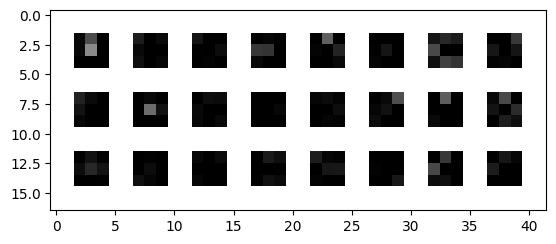

In [34]:
# Only visualize the first out of 24 channels

grid = make_grid(layer_weights[:,:1,:,:], pad_value=1)
np_grid = grid.cpu().numpy()
plt.imshow(np.transpose(np_grid, (1, 2, 0)))
plt.show()

# ...